In [3]:
# Import Required Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from tensorflow.keras.applications import 


In [4]:
## Defining batch specfications
batch_size = 100
img_height = 224
img_width = 224

In [17]:
## loading training set
training_ds = image_dataset_from_directory(
    '/home/hussein/Jupyter NoteBooks/Graduation Project/PlantVillage/train',
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 43444 files belonging to 38 classes.


In [8]:
## loading validation dataset
validation_ds = image_dataset_from_directory(
    '/home/hussein/Jupyter NoteBooks/Graduation Project/PlantVillage/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 10860 files belonging to 38 classes.


# Data Augmentation

### Random Rotation Augmentation

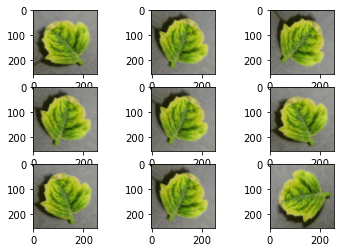

In [29]:
# load a sample image
img = load_img('/home/hussein/Jupyter NoteBooks/Graduation Project/img_2.JPG')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()


### Random Brightness Augmentation

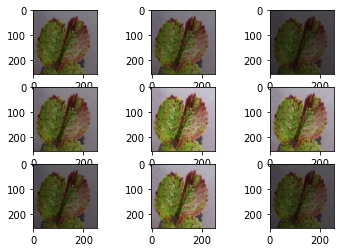

In [30]:
# load the image
img = load_img('/home/hussein/Jupyter NoteBooks/Graduation Project/img_3.JPG')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

### Random Zoom Augmentation

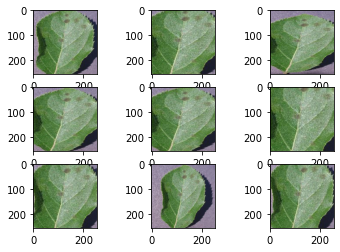

In [32]:
# load the image
img = load_img('/home/hussein/Jupyter NoteBooks/Graduation Project/img_1.JPG')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

In [13]:
# imoort the pretrained model ResNet50 to use as a base model 
# inluding top refers to Imagnet dataset wheights 
# input_shape defines the Dimensions of input images 
base_model = ResNet50(include_top=False,input_shape=(224,224,3))
base_model.summary()

94773248/94765736 [==============================] - 172s 2us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [ ]:
# Define a classifier in The top of ResNet base Model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(265,activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(38,activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 265)               26593545  
_________________________________________________________________
dropout_2 (Dropout)          (None, 265)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 265)               1060      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               34048     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [1]:
#compile the model with Adam Optimizer 
# sparse_categorical_crossentropy loss function used as the number of classes is large (38 class ) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NameError: name 'model' is not defined

In [34]:
# Callbaacks path
file_path="./best_weights_2.hdf5"

# Early Stopping Used to interrupt the training process
# when the validation loss is no longer improving
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3)

#ModelCheckpoint callback allows you to continually save the model 
#both during and at the end of training.
checkpointer = ModelCheckpoint(filepath=file_path, 
                               monitor = 'val_loss',
                               verbose=2, 
                               save_best_only=True)
callbacks_list = [checkpointer, es] 
callbacks_path = file_path 


In [35]:
## training of the model 
history = model.fit(training_ds,validation_data= validation_ds,epochs = 5,callbacks=callbacks_list)

Epoch 1/5
703/703 [==============================] - ETA: 0s - loss: 0.5276 - accuracy: 0.8695
Epoch 00001: val_loss improved from inf to 0.34590, saving model to ./best_weights_2.hdf5
703/703 [==============================] - 628s 894ms/step - loss: 0.5276 - accuracy: 0.8695 - val_loss: 0.3459 - val_accuracy: 0.9023
Epoch 2/5
703/703 [==============================] - ETA: 0s - loss: 0.1381 - accuracy: 0.9628
Epoch 00002: val_loss improved from 0.34590 to 0.21437, saving model to ./best_weights_2.hdf5
703/703 [==============================] - 629s 895ms/step - loss: 0.1381 - accuracy: 0.9628 - val_loss: 0.2144 - val_accuracy: 0.9313
Epoch 3/5
703/703 [==============================] - ETA: 0s - loss: 0.0908 - accuracy: 0.9753
Epoch 00003: val_loss did not improve from 0.21437
703/703 [==============================] - 628s 894ms/step - loss: 0.0908 - accuracy: 0.9753 - val_loss: 0.8445 - val_accuracy: 0.7712
Epoch 4/5
703/703 [==============================] - ETA: 0s - loss: 0.0709

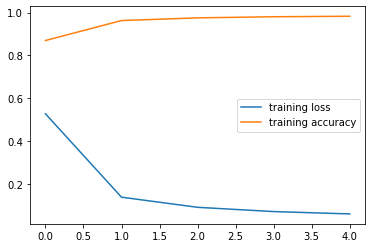

In [36]:
# showing the result of the model performance on training data
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

In [37]:
model.load_weights('./best_weights.hdf5')

In [38]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted : '+ predlabel[i]+'\nactual : '+class_names[labels[i]] ,fontsize=18)
        plt.axis('off')
        plt.grid(True)

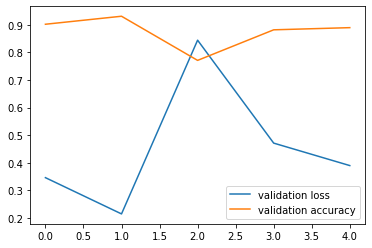

In [42]:
# showing the result of the model performance on validation data
# best weights saved for validation accuracy = 96 and val_loss = 0.13 
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

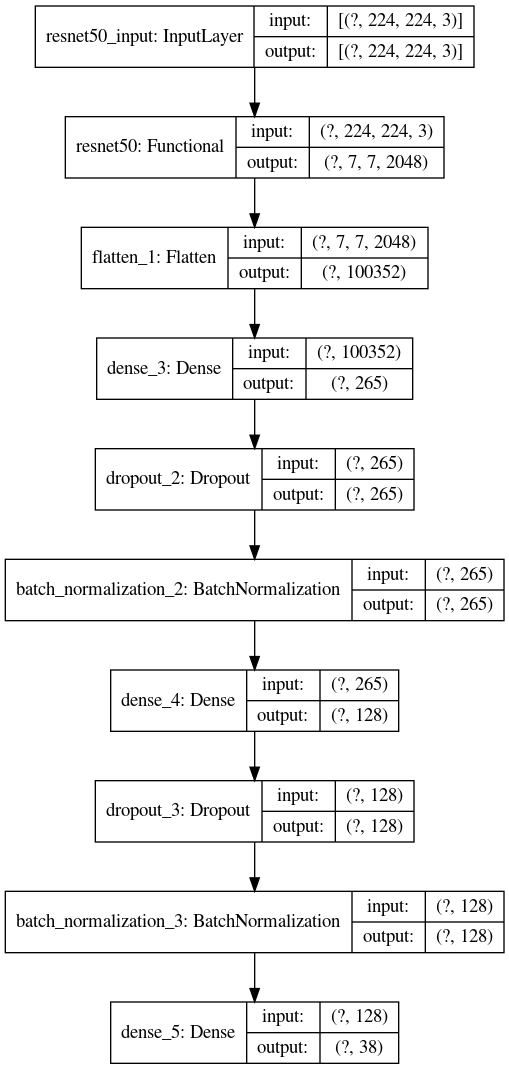

In [40]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [43]:
file = model.save('./model.h5')

In [44]:
dir_path = os.path.dirname(os.path.realpath('model.h5'))
dir_path

'/kaggle/working'

In [45]:
from IPython.display import FileLink
FileLink('model.h5')

/kaggle/working/model.h5

In [46]:
FileLink('./best_weights.hdf5')

/kaggle/working/best_weights.hdf5

In [ ]:
FileLink('./model_plot.png')

In [ ]:
# download with FileLink:
# –from IPython.display import FileLink
# –FileLink(‘testing.pth’)

In [6]:
import keras
model = keras.models.load_model('best_weights_96.hdf5')

In [8]:
#saving model 
model_json = model.to_json()
with open('PlantDoctor.json','w') as json_file:
    json_file.write(model_json)
    

In [9]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

tfModel = converter.convert()
with open('Green Doctor ResNet.tflite','wb') as file:
    file.write(tfModel)

INFO:tensorflow:Assets written to: /tmp/tmp6fcyzufs/assets
